# Introduction


#####  This is the TMDb movie data set for data analysis.it contains about 10,000 movies and thats alot, i will try to find the other faces adn patterns of the dataset.



this database contains the following features:-

- movie_id - A unique identifier for each movie.
- imdb_id - A unique identifier for each movie on IMDB.
- cast - The name of lead and supporting actors.
- director - the director of the movie
- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is infact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- tagline - Movie's tagline.
- vote_average - average ratings the movie recieved.
- budget_adj - shows the budget associated movie in terms of 2010 dollars.
- revenue_adj - shows the revenue associated movie in terms of 2010 dollars.

It contains exactly:

Total Rows = 10866

Total Columns = 21

## Here is some Questions we can ask:
- Question 1: is there any relation between the Revenue, Popularity, and Rating?
- Question 2: Which Movie Has The Highest profit?
- Question 3 : Which genres was more used during the timelife of this dataset ?

Now lets start working...

# Data Rangling


let's take a peak into the data set

In [22]:
#importing all wanted libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#loading the file of the movies the dataset

mo = pd.read_csv('tmdb-movies.csv')

In [23]:
mo.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


After Observing the dataset will try in this analysis to keep only relevent data and deleting the unused data.

but let's dive more deep to find more observations.

Well, obviously hhere are 10866 columns and 21 columns.

1. “id”, “imdb_id” columns are similar column so we can get rid of one of them. I'd choose “imdb_id” column which is not given any useful information for this analysis. also it's a string and i'd like to deal with integers.

2. “popularity”, “budget”, and “revenue” columns are useful for this analysis and we are going to calculate the profit extract the revenue from the budget column. But previously we need the handle the missing values from budget and revenue column.

3. “original_title”, “cast”, “director” columns have useful information about the movies.

4. “homepage”, “tagline”, “keywords”, “overview”, “vote_average”, “budget_adj”, “revenue_adj” columns are not useful for analysis so these columns could be deleted from the data frame.

5. “release_date”, and “release_year” columns also important. And we need the convert the release_date column to pandas DateTime object.

# Data Cleaning

### Well, in this phase i'll try to:-

- Drop the duplicated rows.

- Drop the rows which have missing values.

- Delete the unused columns from Data Frame.

- Checking the all columns are in the desired data type.

- Calculating the profit extracting revenue from the budget.

In [24]:
#Getting rid of all unwanted columns...

mo.drop('homepage',axis=1,inplace=True)

mo.drop('tagline',axis=1,inplace=True)

mo.drop('keywords',axis=1,inplace = True)

mo.drop('release_date',axis=1,inplace=True)

mo.drop('budget_adj',axis=1,inplace=True)

mo.drop('revenue_adj',axis=1,inplace=True)

mo.drop('imdb_id',axis=1,inplace=True)

mo.drop('overview',axis=1,inplace=True)

let's see if there any duplicates 

In [25]:
#droping duplicates...

mo.duplicated().sum()

1





Now lets drop the duplicate value we have

In [26]:
mo.drop_duplicates(inplace= True)



is there any null values ? 

In [27]:
#Droping null values...

mo.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

 We found alot of null values , lets get rid of it shall we..

In [28]:
mo.dropna(axis=0,inplace=True)

# Exploratory Data Analysis
   
    

## Question 1: is there any relation between the Revenue, Popularity, and Rating?

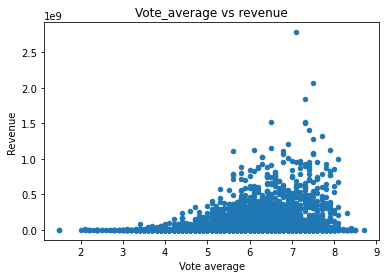

In [29]:
#relation between vote and revenue

mo.plot(x='vote_average',y='revenue',kind='scatter')
plt.xlabel('Vote average')
plt.ylabel('Revenue')
plt.title('Vote_average vs revenue');

here we can find that Revenue increases with increase in Popularity.


##### now let's see the relationship or the correlation between Popularity vs Ratings using the matblotlib scatter-plot

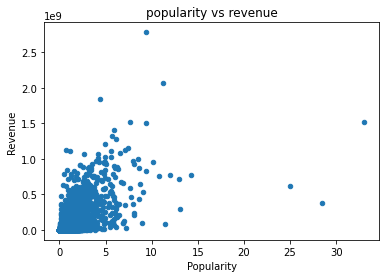

In [30]:
#relation between popularity and revenue 

mo.plot(x='popularity',y='revenue',kind='scatter')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('popularity vs revenue');

##### now let's see the relationship or the correlation between Revenue vs Ratings using the matblotlib scatter-plot

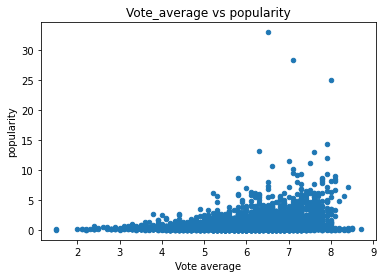

In [31]:
#the relation between vote and popularity

mo.plot(x='vote_average',y='popularity',kind='scatter')
plt.xlabel('Vote average')
plt.ylabel('popularity')
plt.title('Vote_average vs popularity');

it's obvious that the relationship between the ratings vs revenue, and Popularity vs Ratings are rightly-biased

## Question 2: Which Movie Has The Highest profit?

lets calculate Profit for each movie first . let's do it!

In [32]:
#Calculating profit 

mo['profit'] = mo['revenue']-mo['budget']
mo['profit'] = mo['profit'].apply(np.int64)
mo['budget'] = mo['budget'].apply(np.int64)
mo['revenue'] = mo['revenue'].apply(np.int64)

let's find out what are the top five profitable movies?

In [33]:
def top_5(col_name,size=5):
    #sort the given column and select the top 5
    mo_sorted = pd.DataFrame(mo[col_name].sort_values(ascending=False))[:size]
    mo_sorted['original_title'] = mo['original_title']
    plt.figure(figsize=(12,6))
    #Making the Chart
    sns.barplot(x=col_name, y='original_title', data=mo_sorted, label=col_name)
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 5 Movies in: ' + col_name.capitalize())
    plt.legend()

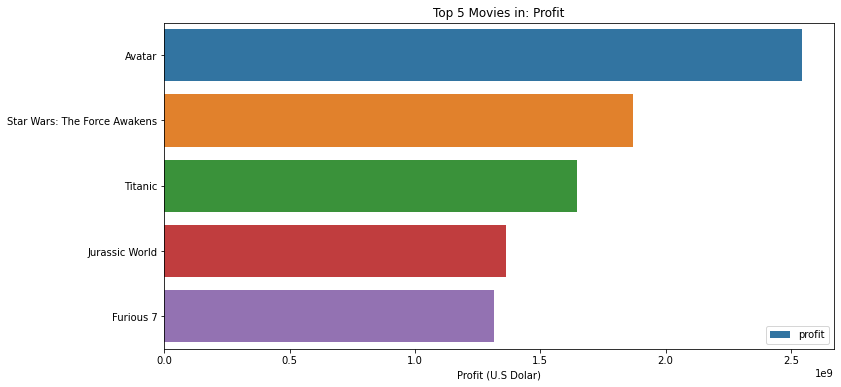

In [34]:
top_5('profit')

As we can see that 'Avatar' movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit in this dataset.

## Question 3 : Which genres was more used during the timelife of this dataset ?

In [35]:
from matplotlib import gridspec
def split_count_data(col_name, size=15):
    ##function which will take any column as argument from which data is need to be extracted and keep track of count
    #take a given column, and separate the string by '|'
    data = mo[col_name].str.cat(sep='|')
    #storing the values separately in the series
    data = pd.Series(data.split('|'))
    #Let's count the most frequenties values for given column
    count = data.value_counts(ascending=False)
    count_size = count.head(size)
    #Setting axis name for multiple names
    if (col_name == 'production_companies'):
        sp = col_name.split('_')
        axis_name = sp[0].capitalize()+' '+ sp[1].capitalize()
    else:
        axis_name = col_name.capitalize()
    fig = plt.figure(figsize=(14, 6))
    #set the subplot 
    gs = gridspec.GridSpec(1,2, width_ratios=[2,2])
    #count of given column on the bar plot
    ax0 = plt.subplot(gs[0])
    count_size.plot.barh()
    plt.xlabel('Number of Movies')
    plt.ylabel(axis_name)
    plt.title('The Most '+str(size)+' Filmed ' +axis_name+' Versus Number of Movies')
    ax = plt.subplot(gs[1])
    #setting the explode to adjust the pei chart explode variable to any given size
    explode = []
    total = 0
    for i in range(size):
         total = total + 0.015
         explode.append(total)
    #pie chart for given size and given column
    ax = count_size.plot.pie(autopct='%1.2f%%', shadow=True, startangle=0, pctdistance=0.9, explode=explode)
    plt.title('The most '+str(size)+' Filmed ' +axis_name+ ' in Pie Chart')
    plt.xlabel('')
    plt.ylabel('')
    plt.axis('equal')
    plt.legend(loc=9, bbox_to_anchor=(1.4, 1))


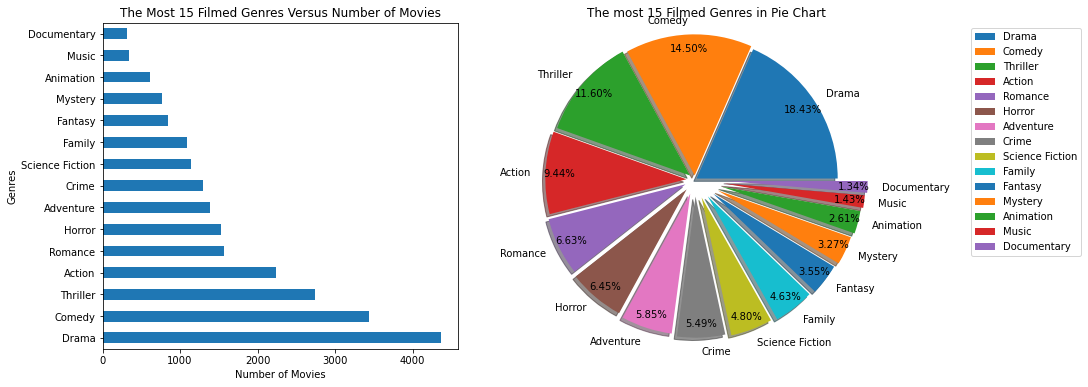

In [36]:
split_count_data("genres")

# Conclusions

### Question 1:

from the various scatter plots, we can easily conclude that The Revenue increases with increase in Popularity,That makes Revenue and Popularity are directly proportional. We also visualize the right-biased normal distributions for relationship between Revenue Vs Rating and Popularity Vs Rating.



######  limitations: Here I faced various limitations. Firstly there were many rows within the dataframe which contained a certain amount of null values(a lot to be honest). So, first I had to DORP those rows. Furthermore, the data also contained a duplicated value row (2090), which had to be removed, following a re-check of null values for our key parameters.

### Question2:

 As we can see that 'Avatar' movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit in this dataset. and 'Star Wars' and 'Titanic' are the most profitable movies.

###### Limitations: Here I faced various limitations. There were no info about the profit of each movie but there was about the revenue and the budget of each movie so I calculated it

### Question3:

from the pie chart and the bar chart we can see

- Drama is the most popular genre, following by action, comedy and thriller.
- Drame, Comedy, Thriller and Action are four most-made genres. 

###### Limitaions: The data in the columns of (Directors, genres, production_companies) are sperated by ' |' so inhad limitations there, but i solved it by making a function to extract the strings from the seprator ' |'.